In [1]:
from google.colab import files
uploaded = files.upload()

Saving Bengaluru_House_Data.csv to Bengaluru_House_Data.csv


# New Section

In [2]:
import pandas as pd
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [7]:
## removing the availabilty and society columns as they as not necessary

In [8]:
df.drop(['availability','society'],axis=1,inplace = True)
df.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

In [9]:
for col in df.columns:
  print(df[col].value_counts())
  print("\n\n")

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64



location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64



size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            

In [10]:
for col in df.columns:
  print(f"{col} : {df[col].unique()}")
  print("\n")

area_type : ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']


location : ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


size : ['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']


total_sqft : ['1056' '2600' '1440' ... '1133 - 1384' '774' '4689']


bath : [ 2.  5.  3.  4.  6.  1.  9. nan  8.  7. 11. 10. 14. 27. 12. 16. 40. 15.
 13. 18.]


balcony : [ 1.  3. nan  2.  0.]


price : [ 39.07 120.    62.   ...  40.14 231.   488.  ]




Data Cleaning And Handling

In [11]:
## problems in  the dataset
# 1. there are some null values -> location , size , bath column null values can be ignored (removed) as less in number
##                        but have to handle the null values of balcony -> replaced by mean

#  2. size column has data in different formats like BHK(2 BHK ) and bedroom( 3 Bedroom ) -> taking only the numeric parts like 2 , 3

# 3. unique values with very less count present in columns like location , size, bath etc -> filtered data and used 'others' for such values

# 4. data in different formats for total_sqft column

# 5. outliers removal

# 6. encoding req for columns like location



In [12]:
## Problem 1

In [13]:
df.dropna(subset=['location','size','bath'],axis=0,inplace=True)
df.isnull().sum()

,0
area_type,0
location,0
size,0
total_sqft,0
bath,0
balcony,536
price,0


In [14]:
df['balcony'].replace(np.nan,df['balcony'].mean(),inplace = True )
df['balcony'].isnull().sum()

/tmp/ipython-input-802484498.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balcony'].replace(np.nan,df['balcony'].mean(),inplace = True )


np.int64(0)

In [15]:
# problem 2

In [16]:
df['BHK']= df['size'].apply(lambda x: int(x.split(' ')[0]))
df.drop(['size'],axis=1,inplace=True)
df.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [17]:
# problem 3

In [18]:
locations_groups = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
locations_groups.head()

,location
location,
Whitefield,534
Sarjapur Road,392
Electronic City,302
Kanakpura Road,266
Thanisandra,233


In [19]:
locations_groups.tail()

,location
location,
bsk 6th stage 2ad block near sri conversation hall,1
"beml layout, basaveshwara nagar",1
basaveshwarnagar,1
banashankari stage iii sa,1
"asha township, off hennur road",1


In [20]:
filter = locations_groups >= 20
filter_locations = locations_groups[filter]

In [21]:
filter_locations.head()

,location
location,
Whitefield,534
Sarjapur Road,392
Electronic City,302
Kanakpura Road,266
Thanisandra,233


In [22]:
filter_locations.tail()

,location
location,
Sanjay nagar,20
Binny Pete,20
Yelachenahalli,20
Poorna Pragna Layout,20
HBR Layout,20


In [23]:
## using others for all locations with count <= 20

In [24]:
df['location'] =df['location'].apply(lambda x : x if x in  filter_locations else 'others')

In [25]:
(df['location']=='others').sum()

np.int64(4214)

In [26]:
(df['location']!='others').sum()

np.int64(9032)

In [27]:
# problem 4

In [28]:
sorted(df['total_sqft'].unique())

['1',
 '1.25Acres',
 '1.26Acres',
 '1000',
 '1000 - 1285',
 '10000',
 '1000Sq. Meter',
 '1001',
 '1002',
 '1003',
 '10030',
 '1004',
 '1004 - 1204',
 '1005',
 '1005.03 - 1252.49',
 '1006',
 '1007',
 '1008',
 '1009',
 '1010',
 '1010 - 1300',
 '1011',
 '1012',
 '1013',
 '1014',
 '1015',
 '1015 - 1540',
 '1016',
 '1017',
 '1018',
 '1019',
 '1020',
 '1020.07',
 '10200',
 '1021',
 '1022',
 '1023',
 '1024',
 '1025',
 '1026',
 '1027',
 '1028',
 '1030',
 '1031',
 '1032',
 '1033',
 '1034',
 '1035',
 '1036',
 '1037',
 '1039',
 '1040',
 '1041',
 '1042 - 1105',
 '1043',
 '1044',
 '1045',
 '1046',
 '1047',
 '1048',
 '1049',
 '1050',
 '1051',
 '1052',
 '1052 - 1322',
 '1053',
 '1053.4',
 '1054',
 '1055',
 '1056',
 '1057',
 '1058',
 '1059',
 '1060',
 '1061',
 '1062',
 '10624',
 '1063',
 '1065',
 '1066',
 '1067',
 '1068',
 '1069',
 '1070',
 '1070 - 1315',
 '1071',
 '1072',
 '1073',
 '1074',
 '1075',
 '1076',
 '1076 - 1199',
 '1077',
 '1078',
 '1079',
 '1079 - 1183',
 '1080',
 '1081',
 '1082',
 '1083',

In [29]:
#Sq.Meter, Perch, Sq.Yards, Acres, Cents, Guntha, Grounds.
#1 Sq.Meter = 10.76 sqft
#1 Perch = 272.25 sqft
#1 Sq.Yard = 9 sqft
#1 Acre = 43560.04 sqft
#1 Cent = 435.56 sqft
#1 Guntha = 1089 sqft
#1 Ground = 2400.35 sqft

In [30]:
def solve_units(x):
    x = x.strip().lower().replace(" ", "")
    if "sq.meter" in x:
        return float(x.replace("sq.meter", "").strip()) * 10.76
    if "perch" in x:
        return float(x.replace("perch", "").strip()) * 272.25
    if "sq.yards" in x:
        return float(x.replace("sq.yards", "").strip()) * 9.00
    if "acres" in x:
        return float(x.replace("acres", "").strip()) * 43560.04
    if "cents" in x:
        return float(x.replace("cents", "").strip()) * 435.56
    if "guntha" in x:
        return float(x.replace("guntha", "").strip()) * 1089.00
    if "grounds" in x:
        return float(x.replace("grounds", "").strip()) * 2400.35
    return float(x)

In [31]:
def convert_values(x):
  if isinstance(x,str):
    if '-' in x:
      nums=x.split('-')
      result = (float(nums[0])+ float(nums[1]))/2
    else :
      result = solve_units(x) if any(unit in x for unit in ['Sq. Meter', 'Perch', 'Sq. Yards', 'Acres', 'Cents', 'Guntha', 'Grounds']) else float(x)
  else :
    result = float(x)
  return result

In [32]:
df['total_sqft']=df['total_sqft'].apply(convert_values)

In [33]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [34]:
## renaming a column 'bath'

In [35]:
df.rename(columns={'bath':'bathrooms'},inplace=True)
df.columns

Index(['area_type', 'location', 'total_sqft', 'bathrooms', 'balcony', 'price',
       'BHK'],
      dtype='object')

In [36]:
## adding a new column 'price per sqft.'

In [37]:
df['price_per_sqft']=df['price']/df['total_sqft']
df.head()

,area_type,location,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,0.036998
1,Plot Area,others,2600.0,5.0,3.0,120.00,4,0.046154
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,0.043056
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,0.062459
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,0.042500


In [38]:
## problem 5 - outliers removal

In [39]:
numeric_df=df.select_dtypes(include = np.number)
numeric_df.head()

,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft
0,1056.0,2.0,1.0,39.07,2,0.036998
1,2600.0,5.0,3.0,120.00,4,0.046154
2,1440.0,2.0,3.0,62.00,3,0.043056
3,1521.0,3.0,1.0,95.00,3,0.062459
4,1200.0,2.0,1.0,51.00,2,0.042500


In [40]:
## total_sqft

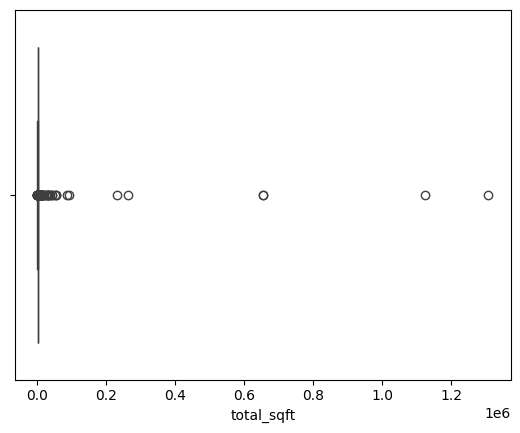

<Figure size 800x400 with 0 Axes>

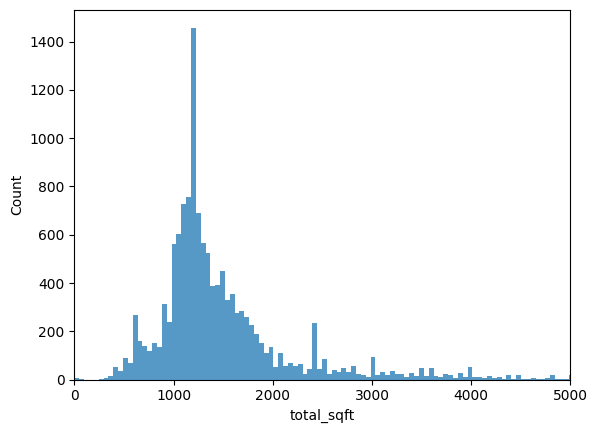

<Figure size 800x400 with 0 Axes>

In [41]:
sns.boxplot(x='total_sqft',data=df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='total_sqft',data=df)
plt.xlim(0,5000)
plt.figure(figsize=(8,4))
plt.show()

In [42]:
df['total_sqft'].describe()

,total_sqft
count,1.324600e+04
mean,1.909248e+03
std,1.732468e+04
min,1.000000e+00
25%,1.100000e+03
50%,1.275000e+03
75%,1.678750e+03
max,1.306801e+06


In [43]:
lower_bound=df['total_sqft'].quantile(0.10)
upper_bound=df['total_sqft'].quantile(0.90)
df['total_sqft']=np.where(df['total_sqft']<lower_bound, lower_bound, df['total_sqft'])
df['total_sqft']=np.where(df['total_sqft']>upper_bound, upper_bound, df['total_sqft'])

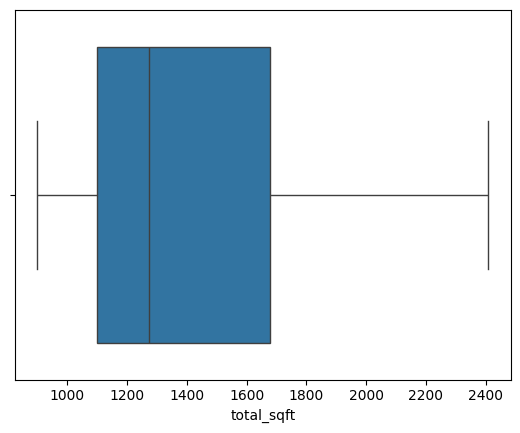

<Figure size 800x400 with 0 Axes>

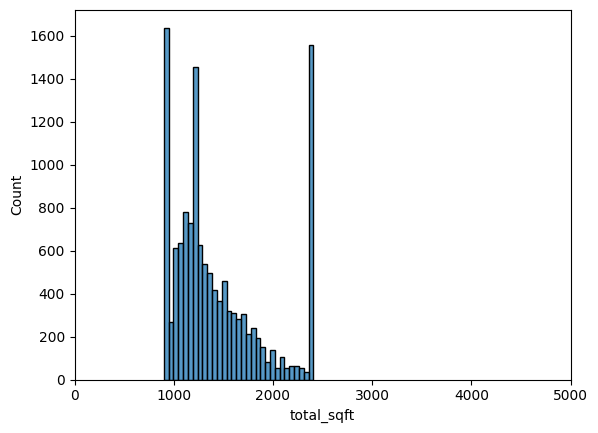

<Figure size 800x400 with 0 Axes>

In [44]:
sns.boxplot(x='total_sqft',data=df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='total_sqft',data=df)
plt.xlim(0,5000)
plt.figure(figsize=(8,4))
plt.show()

In [45]:
df['total_sqft'].describe()

,total_sqft
count,13246.000000
mean,1438.315056
std,467.922813
min,900.000000
25%,1100.000000
50%,1275.000000
75%,1678.750000
max,2408.500000


In [46]:
# price

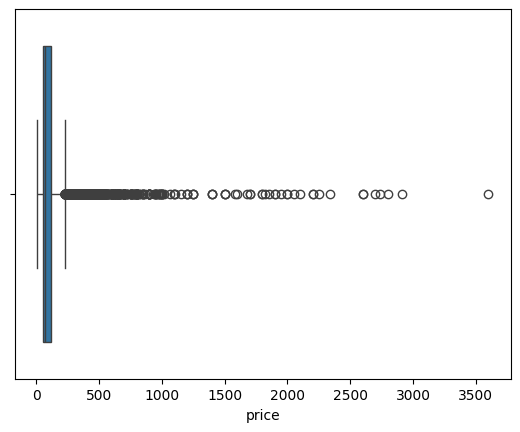

<Figure size 800x400 with 0 Axes>

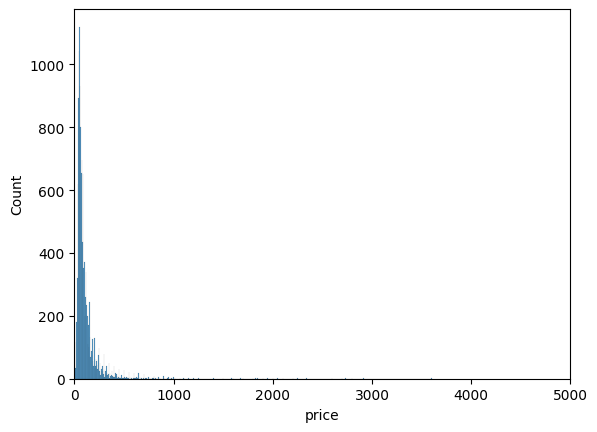

<Figure size 800x400 with 0 Axes>

In [47]:
sns.boxplot(x='price',data=df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='price',data=df)
plt.xlim(0,5000)
plt.figure(figsize=(8,4))
plt.show()

In [48]:
df['price'].describe()

,price
count,13246.000000
mean,112.389392
std,149.076587
min,8.000000
25%,50.000000
50%,72.000000
75%,120.000000
max,3600.000000


In [49]:
lower_bound=df['price'].quantile(0.10)
upper_bound=df['price'].quantile(0.90)
df['price']=np.where(df['price']<lower_bound, lower_bound, df['price'])
df['price']=np.where(df['price']>upper_bound, upper_bound, df['price'])

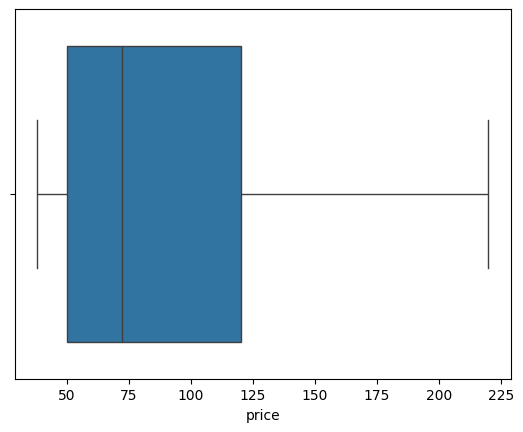

<Figure size 800x400 with 0 Axes>

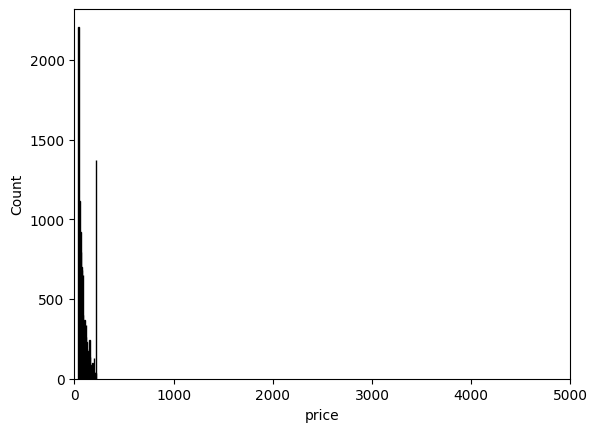

<Figure size 800x400 with 0 Axes>

In [50]:
sns.boxplot(x='price',data=df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='price',data=df)
plt.xlim(0,5000)
plt.figure(figsize=(8,4))
plt.show()

In [51]:
df['price'].describe()

,price
count,13246.000000
mean,93.541210
std,57.585644
min,38.000000
25%,50.000000
50%,72.000000
75%,120.000000
max,220.000000


In [52]:
## price_per_sqft

In [53]:
df['price_per_sqft'].describe()

,price_per_sqft
count,13246.000000
mean,0.079153
std,1.065452
min,0.000023
25%,0.042623
50%,0.054331
75%,0.073171
max,120.000000


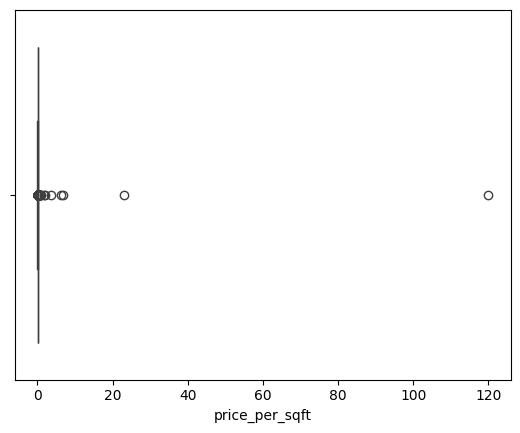

<Figure size 800x400 with 0 Axes>

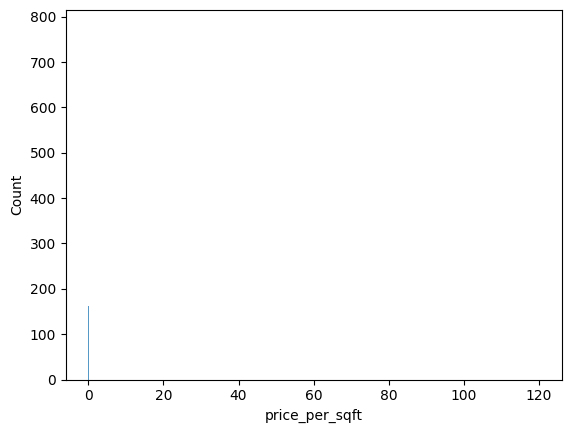

<Figure size 800x400 with 0 Axes>

In [54]:
sns.boxplot(x='price_per_sqft',data=df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='price_per_sqft',data = df)
plt.figure(figsize=(8,4))
plt.show()

In [55]:
upper_bound = df['price_per_sqft'].quantile(0.90)
df['price_per_sqft']= np.where(df['price_per_sqft']>upper_bound, upper_bound,df['price'])

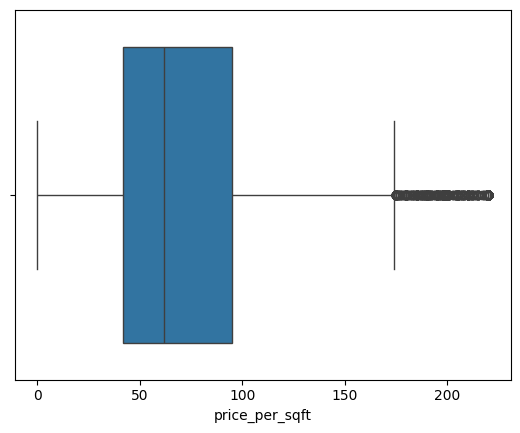

<Figure size 800x400 with 0 Axes>

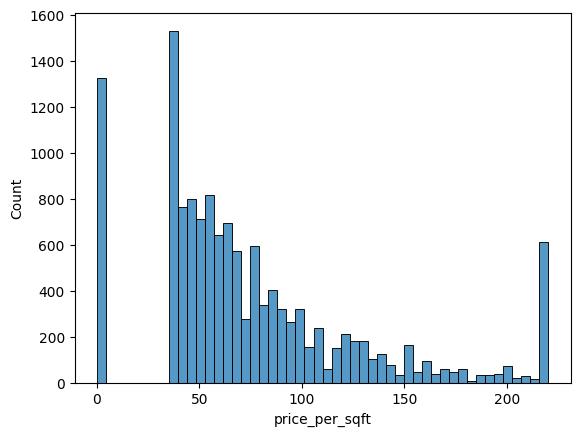

<Figure size 800x400 with 0 Axes>

In [56]:
sns.boxplot(x='price_per_sqft',data=df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='price_per_sqft',data = df)
plt.figure(figsize=(8,4))
plt.show()

In [57]:
df['price_per_sqft'].describe()

,price_per_sqft
count,13246.000000
mean,74.976773
std,52.527193
min,0.116574
25%,42.000000
50%,62.000000
75%,95.000000
max,220.000000


In [58]:
## balcony

In [59]:
df['balcony'].describe()

,balcony
count,13246.000000
mean,1.584343
std,0.800579
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,3.000000


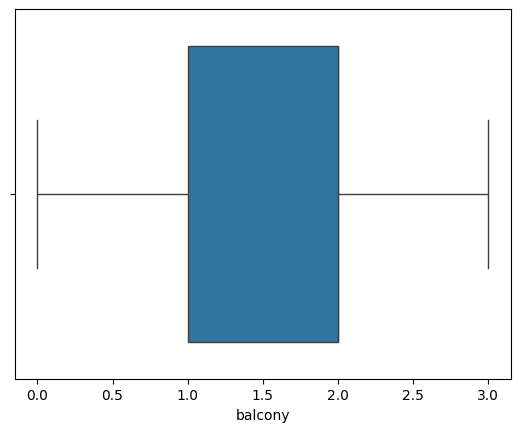

<Figure size 800x400 with 0 Axes>

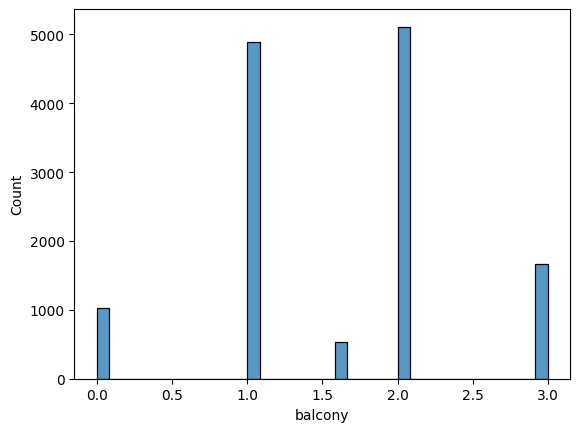

<Figure size 800x400 with 0 Axes>

In [60]:
sns.boxplot(x='balcony',data=df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='balcony',data=df)
plt.figure(figsize=(8,4))
plt.show()

In [61]:
df['balcony']=df['balcony'].astype(int)

In [62]:
df.head()

,area_type,location,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1,39.07,2,39.07
1,Plot Area,others,2408.5,5.0,3,120.00,4,120.00
2,Built-up Area,Uttarahalli,1440.0,2.0,3,62.00,3,62.00
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1,95.00,3,95.00
4,Super built-up Area,Kothanur,1200.0,2.0,1,51.00,2,51.00


In [63]:
# BHK

In [64]:
df['BHK'].describe()

,BHK
count,13246.000000
mean,2.801902
std,1.295758
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,43.000000


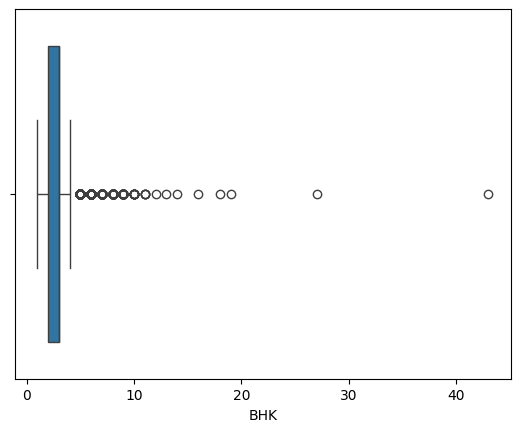

<Figure size 800x400 with 0 Axes>

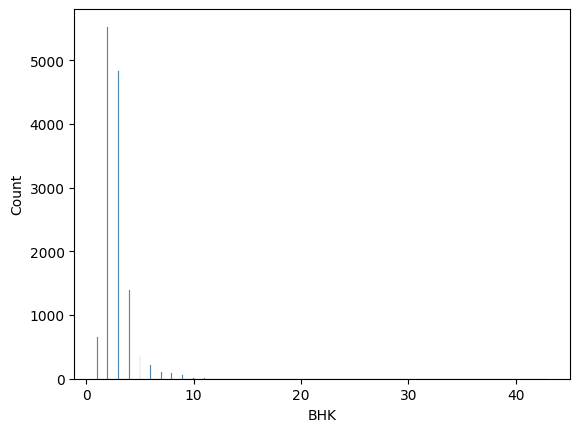

<Figure size 800x400 with 0 Axes>

In [65]:
sns.boxplot(x='BHK',data =df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='BHK',data =df)
plt.figure(figsize=(8,4))
plt.show()

In [66]:
upper_bound = df['BHK'].quantile(0.95)
df['BHK']=np.where(df['BHK']>upper_bound,upper_bound,df['BHK'])

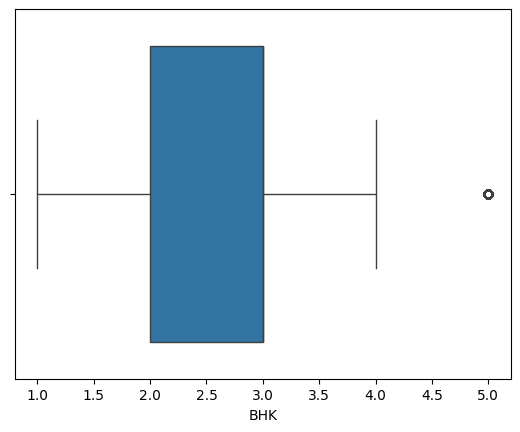

<Figure size 800x400 with 0 Axes>

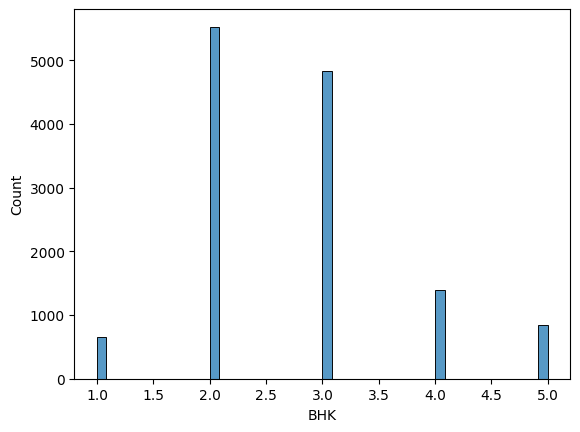

<Figure size 800x400 with 0 Axes>

In [67]:
sns.boxplot(x='BHK',data =df)
plt.figure(figsize=(8,4))
plt.show()
sns.histplot(x='BHK',data =df)
plt.figure(figsize=(8,4))
plt.show()

In [68]:
## bathrooms

In [69]:
df['bathrooms']=df['bathrooms'].astype(int)

In [70]:
df['bathrooms'].shape

(13246,)

In [71]:
df[df['bathrooms'] > df['BHK']+2].shape

(143, 8)

In [72]:
df[~(df['bathrooms'] > df['BHK']+2)].shape

(13103, 8)

In [73]:
df=df[~(df['bathrooms'] > df['BHK']+2)]

In [74]:
## sqft/BHK should be more than 300

In [75]:
df[df['total_sqft']/df['BHK']>300]


,area_type,location,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2,1,39.07,2.0,39.07
1,Plot Area,others,2408.5,5,3,120.00,4.0,120.00
2,Built-up Area,Uttarahalli,1440.0,2,3,62.00,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,1521.0,3,1,95.00,3.0,95.00
4,Super built-up Area,Kothanur,1200.0,2,1,51.00,2.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,2408.5,4,0,220.00,5.0,220.00
13316,Super built-up Area,others,2408.5,5,1,220.00,4.0,220.00
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2,1,60.00,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,2408.5,4,1,220.00,4.0,220.00


In [76]:
num_corr = df[['total_sqft','bathrooms','BHK','balcony']].corr()
num_corr

,total_sqft,bathrooms,BHK,balcony
total_sqft,1.000000,0.611376,0.600821,0.212602
bathrooms,0.611376,1.000000,0.854148,0.196319
BHK,0.600821,0.854148,1.000000,0.200914
balcony,0.212602,0.196319,0.200914,1.000000


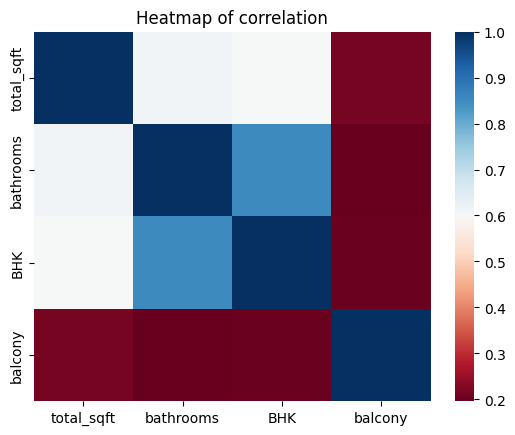

In [77]:
sns.heatmap(num_corr,cmap='RdBu')
plt.title('Heatmap of correlation')
plt.show()

In [78]:
corr_tot_pr = df[['total_sqft', 'price']].corr()
corr_tot_pr

,total_sqft,price
total_sqft,1.000000,0.764012
price,0.764012,1.000000


In [79]:
r,p =pearsonr(df['total_sqft'],df['price'])
print(f" r value is :{r}")
print(f" p value is :{p}")

 r value is :0.7640118713350692
 p value is :0.0


In [80]:
corr_bat_pr = df[['bathrooms', 'price']].corr()
corr_bat_pr

,bathrooms,price
bathrooms,1.000000,0.672741
price,0.672741,1.000000


In [81]:
r,p =pearsonr(df['bathrooms'],df['price'])
print(f" r value is :{r}")
print(f" p value is :{p}")

 r value is :0.6727410894805208
 p value is :0.0


In [82]:
corr_bal_pr = df[['balcony', 'price']].corr()
corr_bal_pr

,balcony,price
balcony,1.00000,0.12849
price,0.12849,1.00000


In [83]:
r,p =pearsonr(df['balcony'],df['price'])
print(f" r value is :{r}")
print(f" p value is :{p}")

 r value is :0.12848957407763822
 p value is :2.3618280413069586e-49


In [84]:
corr_bhk_pr = df[['BHK', 'price']].corr()
corr_bhk_pr

,BHK,price
BHK,1.000000,0.644448
price,0.644448,1.000000


In [85]:
r,p =pearsonr(df['BHK'],df['price'])
print(f" r value is :{r}")
print(f" p value is :{p}")

 r value is :0.6444475230174875
 p value is :0.0


In [86]:
## problem 6

In [87]:
df_areas = df[['area_type','price']]
df_1 = df_areas.groupby('area_type',as_index=False).mean().sort_values(ascending=False,by='price')
df_1.rename(columns={'price':'average_price'},inplace=True)
df_1.set_index('area_type',inplace=True)
df_1.head()

,average_price
area_type,
Plot Area,141.637348
Built-up Area,91.079916
Carpet Area,84.717384
Super built-up Area,82.391008


In [88]:
df_locations = df[['location','price']]
df_2= df_locations.groupby('location',as_index=False).mean().sort_values(ascending=False,by='price')
df_2.rename(columns={'price':'average_price'},inplace=True)
df_2.set_index('location',inplace=True)
df_2.head()

,average_price
location,
Rajaji Nagar,188.491923
2nd Stage Nagarbhavi,185.045455
Iblur Village,182.240000
Frazer Town,176.456944
Indira Nagar,171.209302


In [89]:
df_3 = df[['area_type','location','price']]
df_3 = df_3.groupby(['area_type','location'],as_index=False).mean().sort_values(ascending=False,by='price')
df_3.rename(columns={'price':'average_price'},inplace=True)
df_3.set_index('area_type',inplace=True)
df_pvt = pd.pivot_table(df_3,index='area_type',columns='location',values='average_price')
df_pvt.head()

location,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
area_type,,,,,,,,,,,,,,,,,,,,,
Built-up Area,100.60000,132.500000,66.690000,84.166667,102.960370,109.125000,99.833333,74.500000,73.216667,141.500000,...,48.800000,66.111111,119.800000,64.000000,113.702593,128.333333,97.838108,51.545455,91.000000,96.591947
Carpet Area,NaN,220.000000,NaN,NaN,NaN,38.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,89.131351
Plot Area,210.00000,188.736842,183.750000,130.000000,150.500000,150.666667,125.250000,104.333333,124.400000,NaN,...,115.141250,124.897059,178.000000,NaN,159.517262,118.750000,138.437500,180.000000,130.428571,141.408936
Super built-up Area,153.59375,NaN,67.652174,108.593333,86.693604,57.225732,56.528571,39.946667,84.240000,89.610476,...,63.429286,53.464286,85.348214,71.188095,85.225081,72.653846,72.370541,59.937500,94.259348,85.780642


In [90]:
df.to_csv('cleaned_data.csv', index=False)

In [91]:
## problem 5 -> encoding

In [92]:
df_a=pd.get_dummies(df['area_type']).astype(int)
df = pd.concat([df,df_1],axis=1)
df.drop('area_type',axis=1,inplace=True)
df.head()

,location,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft,average_price
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,39.07,NaN
1,others,2408.5,5.0,3.0,120.00,4.0,120.00,NaN
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,62.00,NaN
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,95.00,NaN
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,51.00,NaN


In [93]:
df_l=pd.get_dummies(df['location']).astype(int)
df = pd.concat([df,df_l],axis=1)
df.drop('location',axis=1,inplace=True)
df.head()

,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft,average_price,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,1056.0,2.0,1.0,39.07,2.0,39.07,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2408.5,5.0,3.0,120.00,4.0,120.00,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1440.0,2.0,3.0,62.00,3.0,62.00,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3.0,95.00,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2.0,51.00,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df.drop('average_price',axis=1,inplace=True)
df.head()

,total_sqft,bathrooms,balcony,price,BHK,price_per_sqft,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,1056.0,2.0,1.0,39.07,2.0,39.07,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2408.5,5.0,3.0,120.00,4.0,120.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1440.0,2.0,3.0,62.00,3.0,62.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3.0,95.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2.0,51.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


MODEL TRAINING

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = df.drop('price',axis=1)
X.head()

,total_sqft,bathrooms,balcony,BHK,price_per_sqft,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,1056.0,2.0,1.0,2.0,39.07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2408.5,5.0,3.0,4.0,120.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1440.0,2.0,3.0,3.0,62.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,3.0,95.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,2.0,51.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
Y = df['price']
Y.head()

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00


In [98]:
X_train , X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.20, random_state=40)

LINEAR REGRESSION

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
Y_train.fillna(0, inplace=True)
Y_test.fillna(0, inplace=True)

In [101]:
model_1=LinearRegression()
model_1.fit(X_train,Y_train)
Y_pred = model_1.predict(X_test)

In [102]:
## performance metrics

In [103]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold,cross_val_score

In [104]:
MSE = mean_squared_error(Y_test,Y_pred)
MSE

881.5443414410563

In [105]:
r2_val = r2_score(Y_test,Y_pred)
r2_val

0.7249064572952408

In [106]:
X.replace(np.nan,0,inplace=True)
Y.replace(np.nan,0,inplace=True)
cv=KFold(n_splits=5,random_state=None)
results = cross_val_score(LinearRegression(),X ,Y,cv=cv)
print(results.mean())

0.7063557357593359


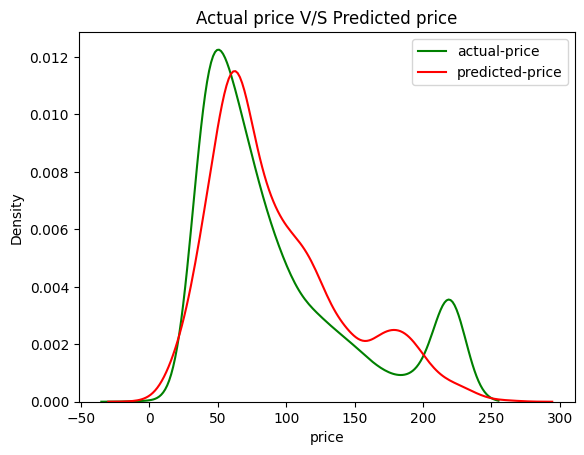

In [107]:
axis1=sns.kdeplot(x=Y_test,color='green',label = 'actual-price')
sns.kdeplot(x=Y_pred,color='red',label = 'predicted-price',ax=axis1)
plt.title('Actual price V/S Predicted price')
plt.legend(loc='best')
plt.show()

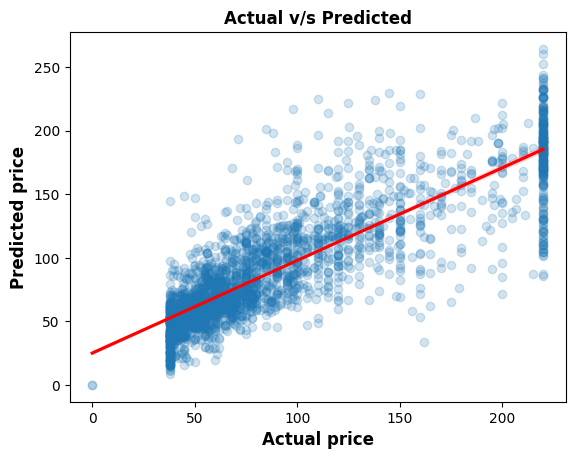

In [108]:
sns.regplot(x=Y_test,y=Y_pred ,scatter_kws={'alpha':0.2},line_kws={'color':'red'})
plt.title('Actual v/s Predicted', fontsize='large',fontweight='bold')
plt.xlabel('Actual price', fontsize='large',fontweight='bold')
plt.ylabel('Predicted price', fontsize='large',fontweight='bold')
plt.show()

Decision Tree

In [109]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
model_2= DecisionTreeRegressor(max_depth=4)
model_2.fit(X_train,Y_train)
Y_pred = model_2.predict(X_test)

In [111]:
MSE = mean_squared_error(Y_test,Y_pred)
MSE

142.14590634747736

In [112]:
r2_val = r2_score(Y_test,Y_pred)
r2_val

0.9556421394592763

In [113]:
cv = KFold(n_splits=4,random_state=None)
results= cross_val_score(DecisionTreeRegressor(),X,Y,cv=cv)
print(results.mean())

0.977243733879676


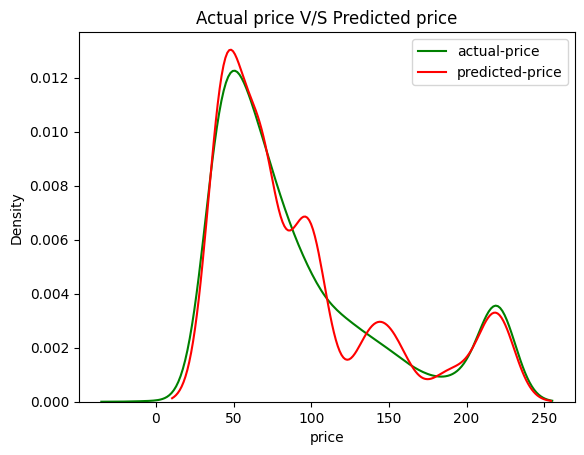

In [114]:
axis1=sns.kdeplot(x=Y_test,color='green',label = 'actual-price')
sns.kdeplot(x=Y_pred,color='red',label = 'predicted-price',ax=axis1)
plt.title('Actual price V/S Predicted price')
plt.legend(loc='best')
plt.show()

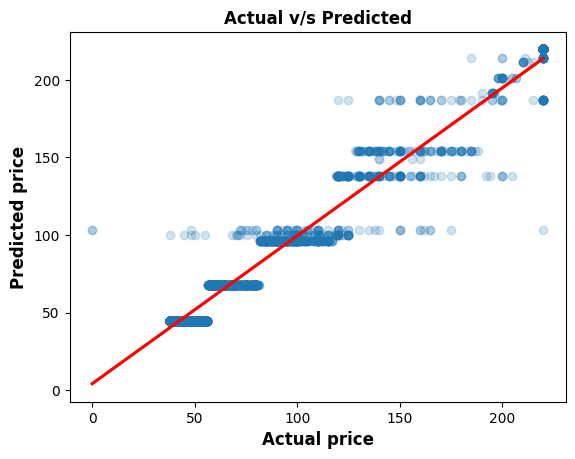

In [115]:
sns.regplot(x=Y_test,y=Y_pred ,scatter_kws={'alpha':0.2},line_kws={'color':'red'})
plt.title('Actual v/s Predicted', fontsize='large',fontweight='bold')
plt.xlabel('Actual price', fontsize='large',fontweight='bold')
plt.ylabel('Predicted price', fontsize='large',fontweight='bold')
plt.show()

Random Forest Regressor

In [116]:
from sklearn.ensemble import RandomForestRegressor

In [117]:
model_3 = RandomForestRegressor(max_depth=4,n_estimators=125)
model_3.fit(X_train,Y_train)
Y_pred = model_3.predict(X_test)

In [118]:
MSE = mean_squared_error(Y_test,Y_pred)
MSE

117.35872196851948

In [119]:
r2_val = r2_score(Y_test,Y_pred)
r2_val

0.9633771949113219

In [120]:
cv = KFold(n_splits=4,random_state=None)
results= cross_val_score(RandomForestRegressor(max_depth=4,n_estimators=125),X,Y,cv=cv)
print(results.mean())

0.9635143414434879


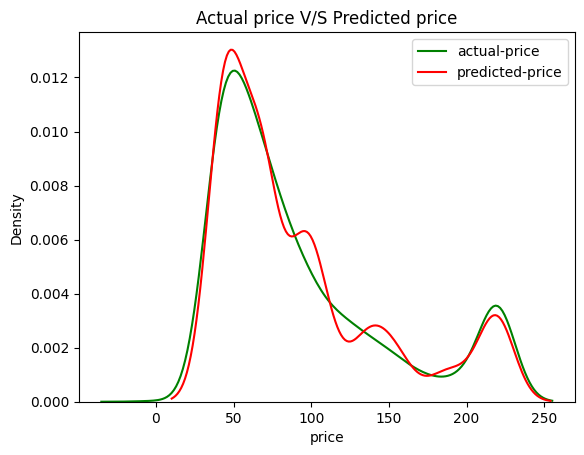

In [121]:
axis1=sns.kdeplot(x=Y_test,color='green',label = 'actual-price')
sns.kdeplot(x=Y_pred,color='red',label = 'predicted-price',ax=axis1)
plt.title('Actual price V/S Predicted price')
plt.legend(loc='best')
plt.show()

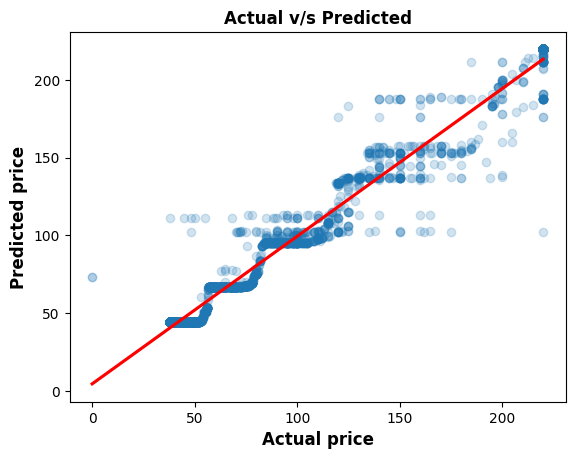

In [122]:
sns.regplot(x=Y_test,y=Y_pred ,scatter_kws={'alpha':0.2},line_kws={'color':'red'})
plt.title('Actual v/s Predicted', fontsize='large',fontweight='bold')
plt.xlabel('Actual price', fontsize='large',fontweight='bold')
plt.ylabel('Predicted price', fontsize='large',fontweight='bold')
plt.show()

In [123]:
## using RandomForestRegresor as it have best performance

In [124]:
def predict_price(model, area_type, location, sqft, balcony, bathroom, BHK):
    x_input = np.zeros(len(X.columns))

    x_input[X.columns.get_loc('total_sqft')] = sqft
    x_input[X.columns.get_loc('bathrooms')] = bathroom
    x_input[X.columns.get_loc('balcony')] = balcony
    x_input[X.columns.get_loc('BHK')] = BHK

    if area_type in X.columns:
        x_input[X.columns.get_loc(area_type)] = 1

    if location in X.columns:
        x_input[X.columns.get_loc(location)] = 1

    return round(model.predict([x_input])[0], 2)


In [125]:
price = predict_price(model_3, 'Built-up  Area', 'Electronic City', 1000, 2, 2, 2)
print("Predicted Price:", price)

Predicted Price: 176.12


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [126]:
import pickle

with open('house_price_model.pkl', 'wb') as f:
    pickle.dump(model_3, f)

In [127]:
from google.colab import files
files.download('house_price_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>